# Plot dell'NDVI su shapefile planisfero

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
import numpy as np

% matplotlib inline

UsageError: Line magic function `%` not found.


<AxesSubplot:>

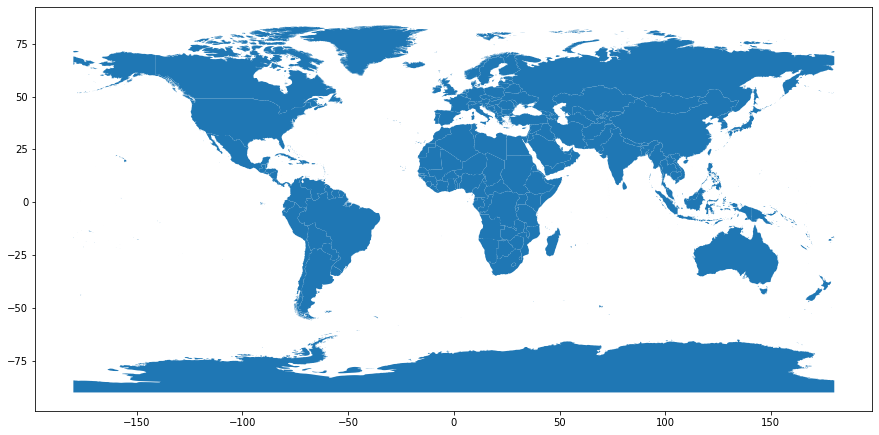

In [8]:
# importo e verifico plot shapefile
shapeWorld = gpd.read_file('/Users/paolo/Documents/Droughts/data/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
fig,ax = plt.subplots(figsize=(15,15))
shapeWorld.plot(ax=ax)

In [2]:
# importo pickle con il dataframe
unpickled_df = pd.read_pickle("/Users/paolo/Documents/Droughts/data/NDVI_2020052.pkl")
unpickled_df.head()

,SMN,latitude,longitude
0,NaN,75.006,-179.982
1,NaN,74.970,-179.982
2,NaN,74.934,-179.982
3,NaN,74.898,-179.982
4,NaN,74.862,-179.982


In [10]:
## non serve shift longitudine da 0/360 a -180/180, è già ok
#unpickled_df['longitude'] = (unpickled_df['longitude'] + 180) % 360 - 180
#unpickled_df.head()

In [3]:
# tengo solo alcuni dati altrimenti troppo pesante per la geometry in locale
df = unpickled_df.loc[(unpickled_df['longitude']<=15) & (unpickled_df['longitude']>=5) & (unpickled_df['latitude']<=48) & (unpickled_df['latitude']>=43)]
df.count()

SMN          31876
latitude     38642
longitude    38642
dtype: int64

## Plot dati su shapefile

In [4]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]

In [5]:
geo_df = gpd.GeoDataFrame(df,geometry=geometry) # ,crs=crs
geo_df.head()

,SMN,latitude,longitude,geometry
18583375,0.124,47.970,5.022,POINT (5.02200 47.97000)
18583376,0.193,47.934,5.022,POINT (5.02200 47.93400)
18583377,0.192,47.898,5.022,POINT (5.02200 47.89800)
18583378,0.182,47.862,5.022,POINT (5.02200 47.86200)
18583379,0.170,47.826,5.022,POINT (5.02200 47.82600)


<AxesSubplot:>

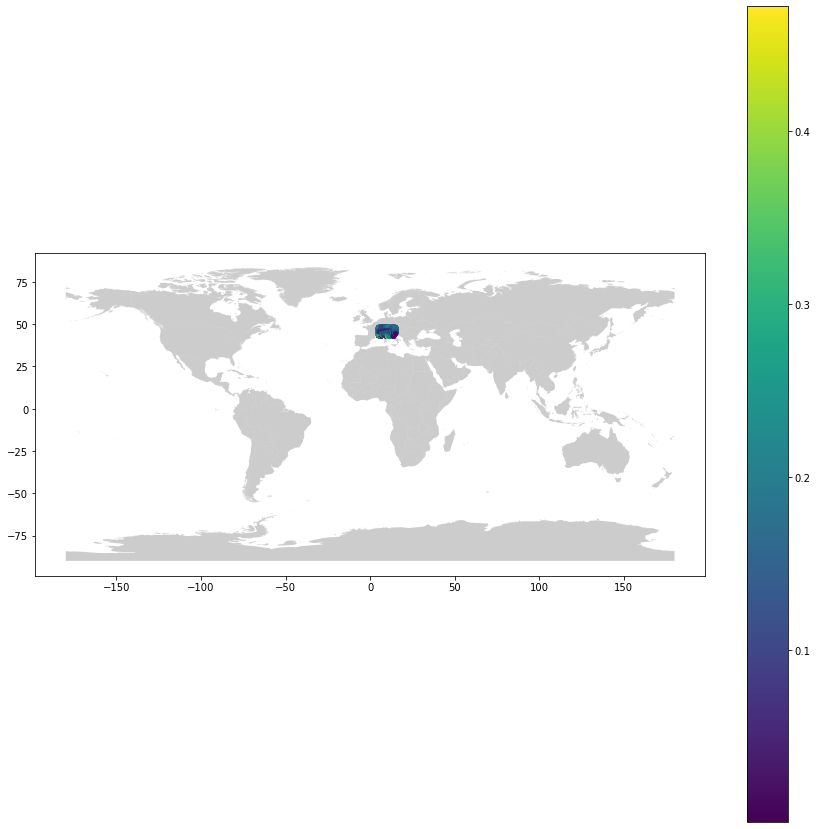

In [9]:
fig,ax = plt.subplots(figsize=(15,15))
shapeWorld.plot(ax=ax,alpha=0.4,color='grey')
geo_df.plot(ax=ax,markersize=20,marker='o',label='SMN',column='SMN',legend=True)
